In [ ]:
data = parse_log_multi_runs("stdout-benchmark_1D.139037.log")



In [ ]:
print(data)



In [ ]:
import matplotlib.pyplot as plt

def plot_speedup(data):
    plt.figure()
    plt.title("Speedup: Jacobi 1D")
    plt.xlabel("Number of Processes")
    plt.ylabel("Speedup (T1 / Tn)")
    for res in sorted(data.keys()):
        if 1 not in data[res]:
            continue
        t1 = data[res][1]
        nprocs_list = sorted(data[res].keys())
        speedups = [t1 / data[res][np] for np in nprocs_list]
        plt.plot(nprocs_list, speedups, marker='o', label=f"res={res}")
    plt.legend()
    plt.grid(True)
    plt.show()



In [ ]:
plot_speedup(data)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Runtime data from analysis
seq_times = {
    125: 194224,
    250: 830202,
    1000: 16317827,
    2000: 63860938
}

mpi_times = {
    125: 10725,
    250: 59240,
    1000: 693391,
    2000: 2677347
}

# Create DataFrame
df = pd.DataFrame({
    "Resolution": list(seq_times.keys()),
    "Sequential": list(seq_times.values()),
    "MPI": [mpi_times[n] for n in seq_times.keys()]
})

# Sort by resolution
df = df.sort_values(by="Resolution")

# Display DataFrame
display(df)

# Plot
plt.figure(figsize=(8,6))
plt.loglog(df["Resolution"], df["Sequential"], marker='o', label='Sequential')
plt.loglog(df["Resolution"], df["MPI"], marker='s', label='MPI')
plt.xlabel("Resolution (N)")
plt.ylabel("Runtime (microseconds)")
plt.title("Sequential vs MPI Runtime Comparison")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


,Resolution,Sequential,MPI
0,125,194224,10725
1,250,830202,59240
2,1000,16317827,693391
3,2000,63860938,2677347


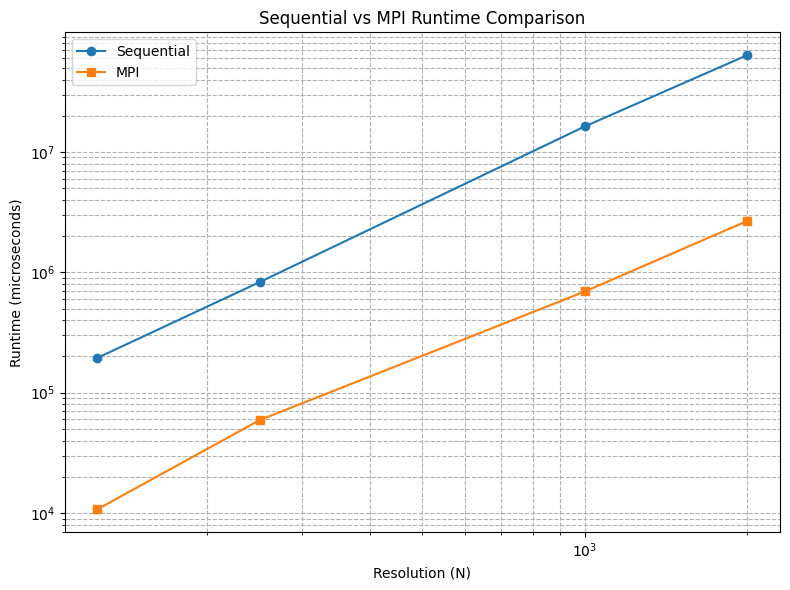

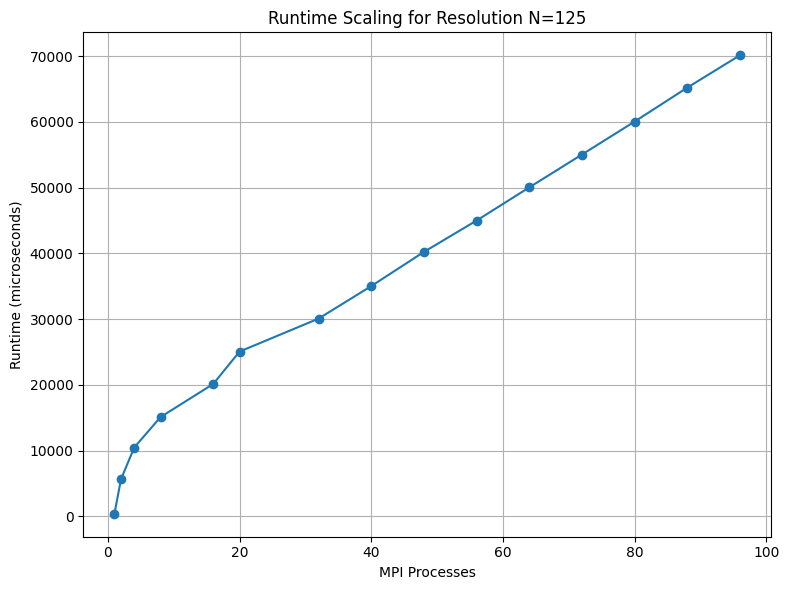

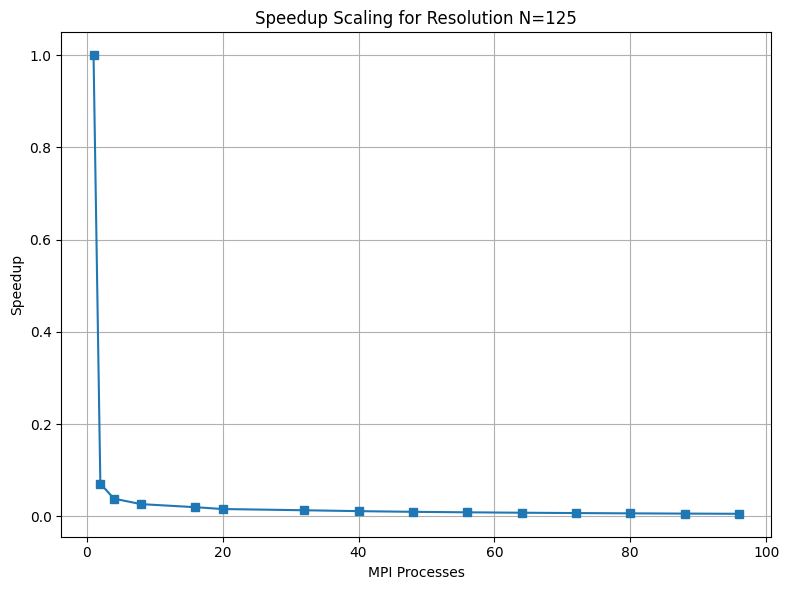

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Runtime data from analysis
seq_times = {
    125: 194224,
    250: 830202,
    1000: 16317827,
    2000: 63860938
}

mpi_times = {
    125: 10725,
    250: 59240,
    1000: 693391,
    2000: 2677347
}

# Create DataFrame for resolution comparison
df_res = pd.DataFrame({
    "Resolution": list(seq_times.keys()),
    "Sequential": list(seq_times.values()),
    "MPI": [mpi_times[n] for n in seq_times.keys()]
})

# Sort by resolution
df_res = df_res.sort_values(by="Resolution")

# Display DataFrame
display(df_res)

# Plot runtime vs resolution
plt.figure(figsize=(8,6))
plt.loglog(df_res["Resolution"], df_res["Sequential"], marker='o', label='Sequential')
plt.loglog(df_res["Resolution"], df_res["MPI"], marker='s', label='MPI')
plt.xlabel("Resolution (N)")
plt.ylabel("Runtime (microseconds)")
plt.title("Sequential vs MPI Runtime Comparison")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# MPI scalability data for N = 125
mpi_processes = [1, 2, 4, 8, 16, 20, 32, 40, 48, 56, 64, 72, 80, 88, 96]
runtimes = [404, 5668, 10468, 15118, 20145, 25075, 30091, 35035, 40237,
             45005, 50053, 55046, 60063, 65227, 70148]

# Create DataFrame for scalability
df_scaling = pd.DataFrame({
    "MPI Processes": mpi_processes,
    "Runtime (μs)": runtimes
})

# Compute speedup relative to 1 process
baseline = runtimes[0]
df_scaling["Speedup"] = baseline / df_scaling["Runtime (μs)"]

# Plot runtime vs MPI processes
plt.figure(figsize=(8,6))
plt.plot(df_scaling["MPI Processes"], df_scaling["Runtime (μs)"], marker='o')
plt.xlabel("MPI Processes")
plt.ylabel("Runtime (microseconds)")
plt.title("Runtime Scaling for Resolution N=125")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot speedup vs MPI processes
plt.figure(figsize=(8,6))
plt.plot(df_scaling["MPI Processes"], df_scaling["Speedup"], marker='s')
plt.xlabel("MPI Processes")
plt.ylabel("Speedup")
plt.title("Speedup Scaling for Resolution N=125")
plt.grid(True)
plt.tight_layout()
plt.show()

,Resolution,Sequential,MPI
0,125,194224,10725
1,250,830202,59240
2,1000,16317827,693391
3,2000,63860938,2677347


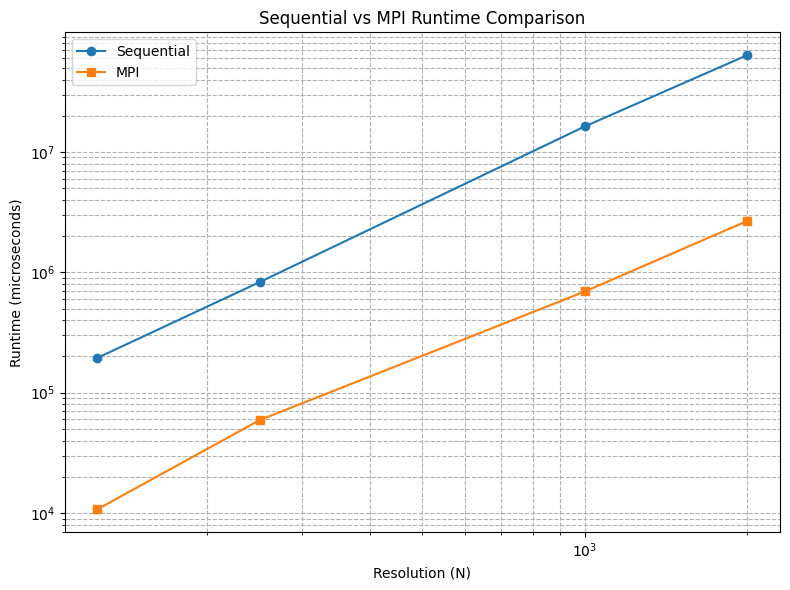

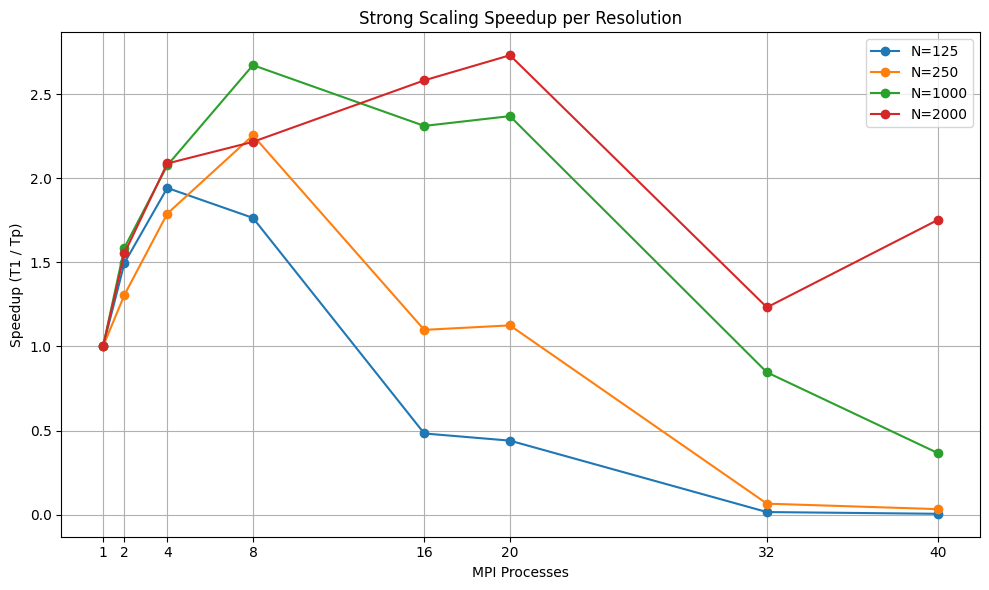

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pathlib import Path

# Runtime data from analysis
seq_times = {
    125: 194224,
    250: 830202,
    1000: 16317827,
    2000: 63860938
}

mpi_times = {
    125: 10725,
    250: 59240,
    1000: 693391,
    2000: 2677347
}

# Create DataFrame for resolution comparison
df_res = pd.DataFrame({
    "Resolution": list(seq_times.keys()),
    "Sequential": list(seq_times.values()),
    "MPI": [mpi_times[n] for n in seq_times.keys()]
})

# Sort by resolution
df_res = df_res.sort_values(by="Resolution")

# Display DataFrame
display(df_res)

# Plot runtime vs resolution
plt.figure(figsize=(8,6))
plt.loglog(df_res["Resolution"], df_res["Sequential"], marker='o', label='Sequential')
plt.loglog(df_res["Resolution"], df_res["MPI"], marker='s', label='MPI')
plt.xlabel("Resolution (N)")
plt.ylabel("Runtime (microseconds)")
plt.title("Sequential vs MPI Runtime Comparison")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

# Load benchmark log file
log_path = Path("stdout-benchmark_1D.139037.log")
log_text = log_path.read_text()
pattern = re.compile(
    r"Running resolution=(\d+), MPI processes=(\d+).*?Runtime: (\d+) microseconds",
    re.DOTALL
)
matches = pattern.findall(log_text)

# Convert to DataFrame
df = pd.DataFrame(matches, columns=["Resolution", "MPI Processes", "Runtime (μs)"])
df["Resolution"] = df["Resolution"].astype(int)
df["MPI Processes"] = df["MPI Processes"].astype(int)
df["Runtime (μs)"] = df["Runtime (μs)"].astype(int)

# Keep only relevant process counts
valid_procs = [1, 2, 4, 8, 16, 20, 32, 40]
df = df[df["MPI Processes"].isin(valid_procs)]

# Compute speedup using T1 per resolution
speedup_data = []
for res, group in df.groupby("Resolution"):
    group = group.set_index("MPI Processes").sort_index()
    if 1 in group.index:
        T1 = group.loc[1, "Runtime (μs)"]
        group["Speedup"] = T1 / group["Runtime (μs)"]
        group["Resolution"] = res
        speedup_data.append(group.reset_index())

df_speedup = pd.concat(speedup_data)

# Plot speedup
plt.figure(figsize=(10, 6))
for res in sorted(df_speedup["Resolution"].unique()):
    sub = df_speedup[df_speedup["Resolution"] == res]
    plt.plot(sub["MPI Processes"], sub["Speedup"], marker='o', label=f"N={res}")

plt.xlabel("MPI Processes")
plt.ylabel("Speedup (T1 / Tp)")
plt.title("Strong Scaling Speedup per Resolution")
plt.xticks(valid_procs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

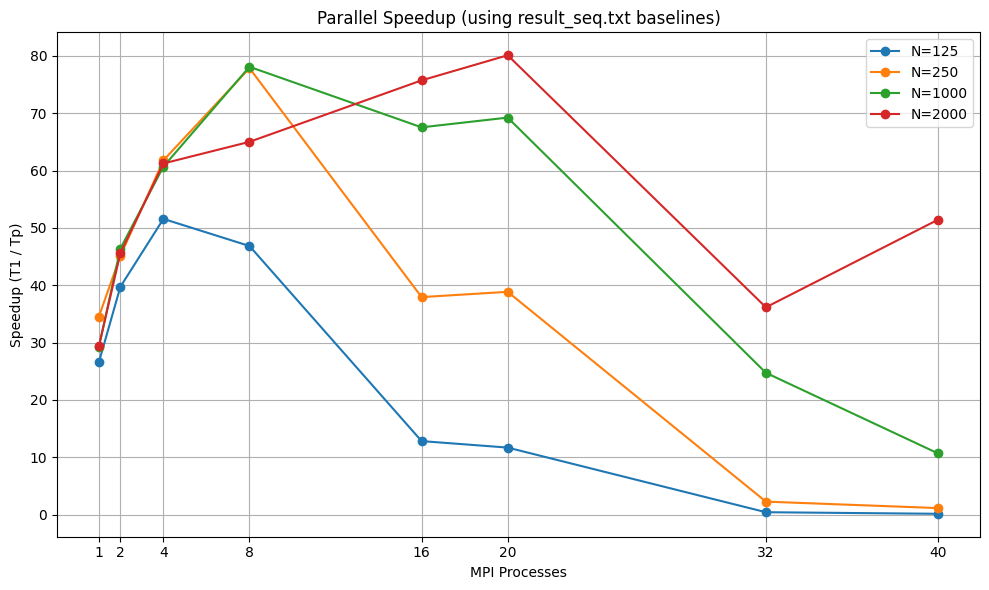

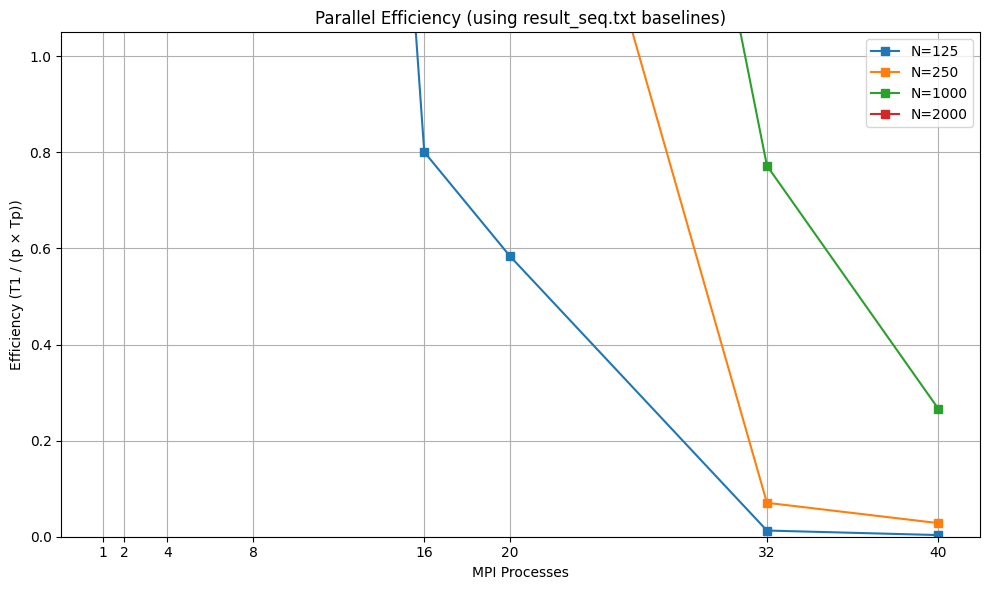

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pathlib import Path

# Load benchmark log file
log_path = Path("stdout-benchmark_1D.139037.log")
log_text = log_path.read_text()
pattern = re.compile(
    r"Running resolution=(\d+), MPI processes=(\d+).*?Runtime: (\d+) microseconds",
    re.DOTALL
)
matches = pattern.findall(log_text)

# Convert to DataFrame
df = pd.DataFrame(matches, columns=["Resolution", "MPI Processes", "Runtime (μs)"])
df["Resolution"] = df["Resolution"].astype(int)
df["MPI Processes"] = df["MPI Processes"].astype(int)
df["Runtime (μs)"] = df["Runtime (μs)"].astype(int)

# Keep only relevant process counts
valid_procs = [1, 2, 4, 8, 16, 20, 32, 40]
df = df[df["MPI Processes"].isin(valid_procs)]

# Use external 1-process baseline timings from result_seq.txt
external_T1 = {
    125: 10725,
    250: 59240,
    1000: 693391,
    2000: 2677347
}

# Compute speedup and efficiency using external T1
speedup_data = []
for res, group in df.groupby("Resolution"):
    if res in external_T1:
        T1 = external_T1[res]
        group = group.set_index("MPI Processes").sort_index()
        group["Speedup"] = T1 / group["Runtime (μs)"]
        group["Efficiency"] = group["Speedup"] / group.index
        group["Resolution"] = res
        speedup_data.append(group.reset_index())

df_speedup = pd.concat(speedup_data)

# Plot speedup
plt.figure(figsize=(10, 6))
for res in sorted(df_speedup["Resolution"].unique()):
    sub = df_speedup[df_speedup["Resolution"] == res]
    plt.plot(sub["MPI Processes"], sub["Speedup"], marker='o', label=f"N={res}")

plt.xlabel("MPI Processes")
plt.ylabel("Speedup (T1 / Tp)")
plt.title("Parallel Speedup (using result_seq.txt baselines)")
plt.xticks(valid_procs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot efficiency
plt.figure(figsize=(10, 6))
for res in sorted(df_speedup["Resolution"].unique()):
    sub = df_speedup[df_speedup["Resolution"] == res]
    plt.plot(sub["MPI Processes"], sub["Efficiency"], marker='s', label=f"N={res}")

plt.xlabel("MPI Processes")
plt.ylabel("Efficiency (T1 / (p × Tp))")
plt.title("Parallel Efficiency (using result_seq.txt baselines)")
plt.xticks(valid_procs)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


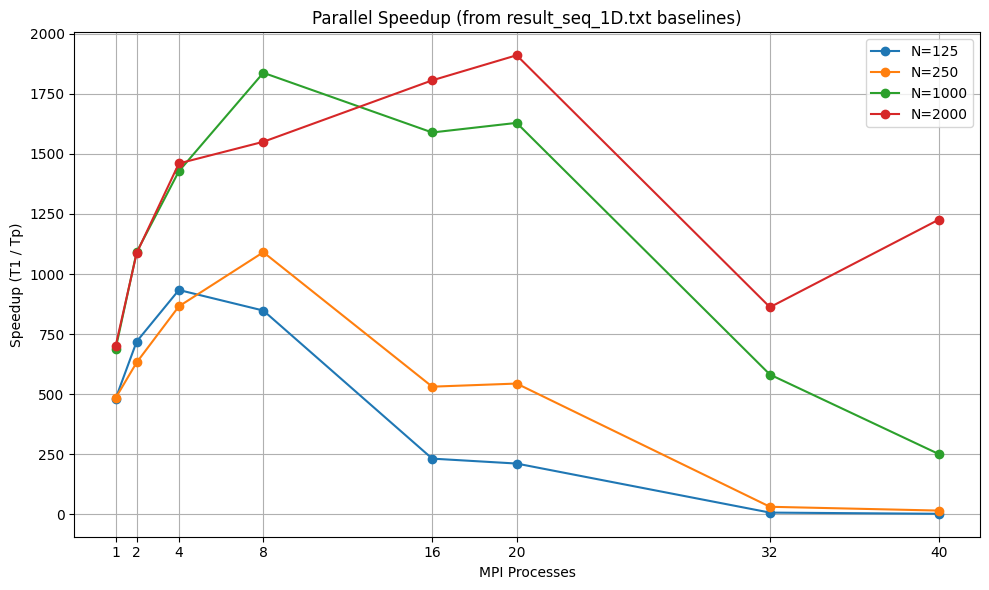

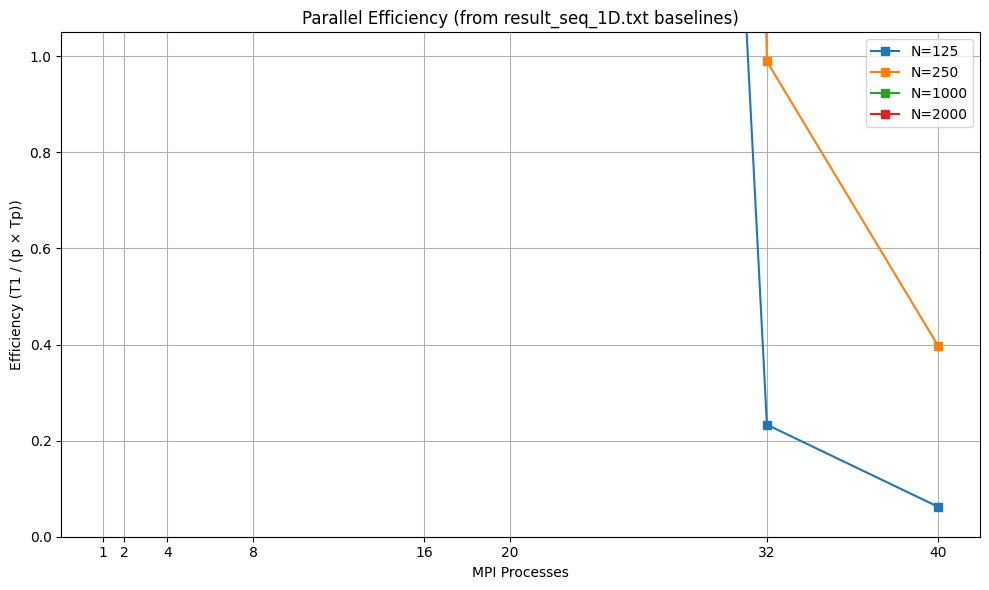

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from pathlib import Path

# Load benchmark log file
log_path = Path("stdout-benchmark_1D.139037.log")
log_text = log_path.read_text()
pattern = re.compile(
    r"Running resolution=(\d+), MPI processes=(\d+).*?Runtime: (\d+) microseconds",
    re.DOTALL
)
matches = pattern.findall(log_text)

# Convert to DataFrame
df = pd.DataFrame(matches, columns=["Resolution", "MPI Processes", "Runtime (μs)"])
df["Resolution"] = df["Resolution"].astype(int)
df["MPI Processes"] = df["MPI Processes"].astype(int)
df["Runtime (μs)"] = df["Runtime (μs)"].astype(int)

# Keep only relevant process counts
valid_procs = [1, 2, 4, 8, 16, 20, 32, 40]
df = df[df["MPI Processes"].isin(valid_procs)]

# Use 1-process timings from result_seq_1D.txt (last run per resolution)
external_T1 = {
    125: 194224,
    250: 830202,
    1000: 16317827,
    2000: 63860938
}

# Compute speedup and efficiency using external T1
speedup_data = []
for res, group in df.groupby("Resolution"):
    if res in external_T1:
        T1 = external_T1[res]
        group = group.set_index("MPI Processes").sort_index()
        group["Speedup"] = T1 / group["Runtime (μs)"]
        group["Efficiency"] = group["Speedup"] / group.index
        group["Resolution"] = res
        speedup_data.append(group.reset_index())

df_speedup = pd.concat(speedup_data)

# Plot speedup
plt.figure(figsize=(10, 6))
for res in sorted(df_speedup["Resolution"].unique()):
    sub = df_speedup[df_speedup["Resolution"] == res]
    plt.plot(sub["MPI Processes"], sub["Speedup"], marker='o', label=f"N={res}")

plt.xlabel("MPI Processes")
plt.ylabel("Speedup (T1 / Tp)")
plt.title("Parallel Speedup (from result_seq_1D.txt baselines)")
plt.xticks(valid_procs)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot efficiency
plt.figure(figsize=(10, 6))
for res in sorted(df_speedup["Resolution"].unique()):
    sub = df_speedup[df_speedup["Resolution"] == res]
    plt.plot(sub["MPI Processes"], sub["Efficiency"], marker='s', label=f"N={res}")

plt.xlabel("MPI Processes")
plt.ylabel("Efficiency (T1 / (p × Tp))")
plt.title("Parallel Efficiency (from result_seq_1D.txt baselines)")
plt.xticks(valid_procs)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()